In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
import os

In [2]:
df_uber=pd.read_csv(r"UberDataset.csv")
df_uber

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [3]:
df_uber.head(10)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,01-06-2016 17:15,01-06-2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
6,01-06-2016 17:30,01-06-2016 17:35,Business,West Palm Beach,Palm Beach,7.1,Meeting
7,01-07-2016 13:27,01-07-2016 13:33,Business,Cary,Cary,0.8,Meeting
8,01-10-2016 08:05,01-10-2016 08:25,Business,Cary,Morrisville,8.3,Meeting
9,01-10-2016 12:17,01-10-2016 12:44,Business,Jamaica,New York,16.5,Customer Visit


In [4]:
df_uber.shape

(1156, 7)

In [5]:
df_uber.size

8092

In [6]:
df_uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [7]:
df_uber.isnull().values.any()

True

In [8]:
df_uber.isnull().values.sum()

507

In [9]:
df_uber.describe()

,MILES
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


In [ ]:
df_uber['PURPOSE']= df_uber['PURPOSE'].fillna('UNKNOWN')
df_uber

In [ ]:
df_uber=df_uber.dropna()
df_uber

In [ ]:
df_uber.describe()

In [10]:
uni_start_destination=df_uber["START"].dropna()
uniq_start=set(uni_start_destination)
uniq_start

{'Agnew',
 'Almond',
 'Apex',
 'Arabi',
 'Arlington',
 'Arlington Park at Amberly',
 'Asheville',
 'Austin',
 'Banner Elk',
 'Bellevue',
 'Berkeley',
 'Boone',
 'Briar Meadow',
 'Bryson City',
 'Burtrose',
 'CBD',
 'Capitol One',
 'Cary',
 'Central',
 'Chalmette',
 'Chapel Hill',
 'Chessington',
 'College Avenue',
 'Colombo',
 'Columbia Heights',
 'Congress Ave District',
 'Connecticut Avenue',
 'Convention Center District',
 'Cory',
 'Couples Glen',
 'Covington',
 'Coxville',
 'Daytona Beach',
 'Downtown',
 'Durham',
 'Eagan Park',
 'Eagle Rock',
 'East Austin',
 'East Elmhurst',
 'East Harlem',
 'Eastgate',
 'Edgehill Farms',
 'El Cerrito',
 'Elk Park',
 'Elmhurst',
 'Emeryville',
 'Fairmont',
 'Farmington Woods',
 'Fayetteville Street',
 'Financial District',
 'Flatiron District',
 'Florence',
 'Fort Pierce',
 'Fuquay-Varina',
 'Galveston',
 'Gampaha',
 'Georgian Acres',
 'Gulfton',
 'Hayesville',
 'Hazelwood',
 "Hell's Kitchen",
 'Heritage Pines',
 'Holly Springs',
 'Houston',
 'Hu

In [11]:
len(uniq_start)

177

In [12]:
stoping_desti=df_uber["STOP"].dropna()  #Printing all the unique Stop destination
unique_stop=set(stoping_desti)
len(unique_stop)

188

In [13]:
start_destination=df_uber["START"].dropna()
df=pd.DataFrame(start_destination.value_counts())
df=df.reset_index()
df=df.rename(columns={"index":"Starting_Point","START":"COUNT"})
df.loc[df["COUNT"]==max(df["COUNT"])]

,Starting_Point,COUNT
0,Cary,201


In [14]:
stop_desti=df_uber["STOP"].dropna()
df_drop=pd.DataFrame(stop_desti.value_counts())
df_drop=df_drop.reset_index()
df_drop=df_drop.rename(columns={"index":"Ending_Point","STOP":"count"})
df_drop.loc[df_drop["count"]==max(df_drop["count"])]

,Ending_Point,count
0,Cary,203


In [15]:
DF=df_uber.dropna()
DF=pd.DataFrame(DF.groupby(["START","STOP"]).size())
DF=DF.rename(columns={0:"count"})
DF=DF.sort_values(['count'],ascending=False)
DF.loc[DF["count"]==max(DF["count"])]

,,count
START,STOP,
Cary,Morrisville,52


In [16]:
print(np.array(df_uber["PURPOSE"].dropna().unique()))

['Meal/Entertain' 'Errand/Supplies' 'Meeting' 'Customer Visit'
 'Temporary Site' 'Between Offices' 'Charity ($)' 'Commute' 'Moving'
 'Airport/Travel']


In [17]:
dfc=pd.DataFrame(df_uber["MILES"].groupby(df_uber["PURPOSE"]).sum())
dfc

,MILES
PURPOSE,
Airport/Travel,16.5
Between Offices,197.0
Charity ($),15.1
Commute,180.2
Customer Visit,2089.5
Errand/Supplies,508.0
Meal/Entertain,911.7
Meeting,2851.3
Moving,18.2


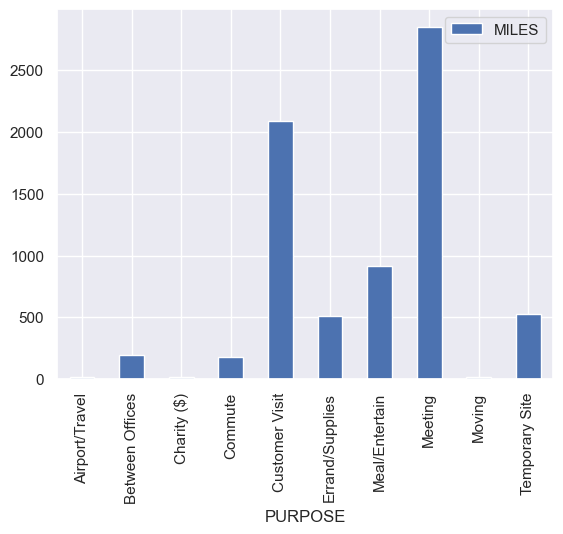

In [18]:
dfc=pd.DataFrame(df_uber["MILES"].groupby(df_uber["PURPOSE"]).sum())
dfc.plot(kind="bar")
plt.show()

<Axes: xlabel='MILES', ylabel='PURPOSE'>

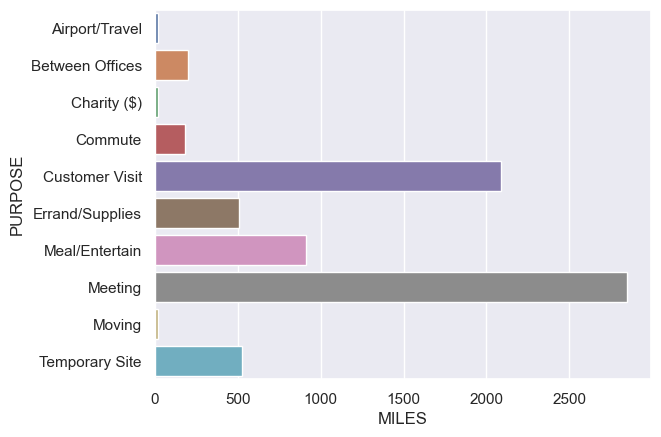

In [20]:
dfc=dfc.reset_index()
sns.barplot(x=dfc["MILES"],y=dfc["PURPOSE"])

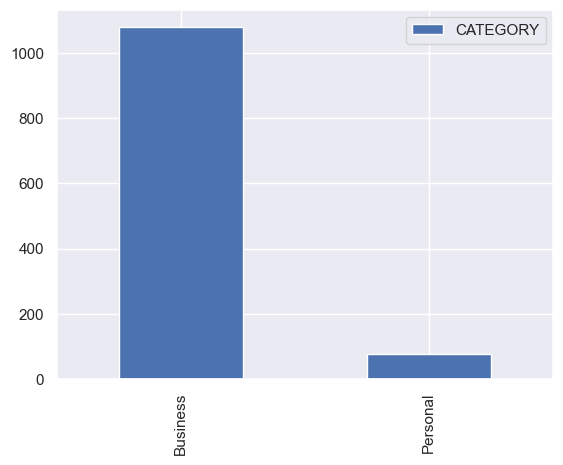

In [25]:
df1=pd.DataFrame(df_uber["CATEGORY"].value_counts())
df1.reset_index()
df1.plot(kind="bar")
plt.show()